# Housing Project

### Data description

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy.Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. 


A US-based housing company named Surprise Housing has decided to enter the Australian market.
The company is looking at prospective properties to buy houses to enter the market.

We are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not.

We are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.

We also need to find important features which affect the price positively or negatively. In this project two datasets are being provided to us (test.csv, train.csv). We will train on train.csv dataset and predict on
test.csv file.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Loading the datasets

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Train dataset
df= pd.read_csv('housing_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [97]:
#Test dataset
test= pd.read_csv('housing_test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

The 'salePrice' column in the train dataset is out target column, which we have to make prediction for in the test dataset.

### EDA

In [5]:
df.shape

(1168, 81)

We have a total of 1168 rows and 81 columns in the dataset.

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We can check all the columns here, the column 'Id' will will play no role in the model building. so we will drop it.

In [7]:
df.drop(['Id'],axis=1, inplace=True)

In [8]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

MSSubClass
[120  20  60  50  70  30 160  85  45  90  40  80 190  75 180]
MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
LotFrontage
[ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]
LotArea
[  4928  15865   9920  11751  16635  14054  11341  13125   9170   8480
   8600   9548   9196   8892  16466  10592   5890   7314   7917   2016
  12435   8445   9717  10659   9230  21000  25339  11394   6380  11988
   7658   3378  18890  12358  14762  10356  10400  12615   7540   9100
  31770  13300   3180   2522   8385   

We can see all the unique values of the features. There are many categorical columns in the dataset which are in object as well as numeric format. Here we can see that the 'utilities' column has only one value in all its records, hence it will play no part in the model building, we need to drop the column.

In [9]:
df.drop(['Utilities'],axis=1, inplace=True)

### Checking missing values for categorical features

In [10]:
catg_fetrs = [i for i in df.columns if df[i].dtypes == 'O']

df[catg_fetrs].isnull().sum()

MSZoning            0
Street              0
Alley            1091
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinType2       31
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu       551
GarageType         64
GarageFinish       64
GarageQual         64
GarageCond         64
PavedDrive          0
PoolQC           1161
Fence             931
MiscFeature      1124
SaleType            0
SaleCondition       0
dtype: int64

The missing values are present in the columns where the particular feature is not available. e.g basement, pool etc. we can replace them by
'unavailable'. But in the 'MasVnrType' column, a none category is already present, there we can replace the missing value with the most frequent data.

In [11]:
# Replacing the missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy= 'most_frequent')
df['MasVnrType']= imp.fit_transform(df['MasVnrType'].values.reshape(-1,1))

In [12]:
df[catg_fetrs]= df[catg_fetrs].fillna('Unavailable')

### Checking missing values for numerical features

In [13]:
num_fetrs = [i for i in df.columns if df[i].dtypes != 'O']

df[num_fetrs].isnull().sum()

MSSubClass         0
LotFrontage      214
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         7
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       64
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

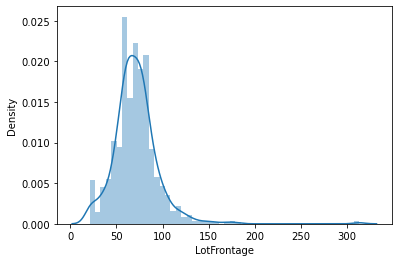

In [14]:
sns.distplot(df['LotFrontage']);

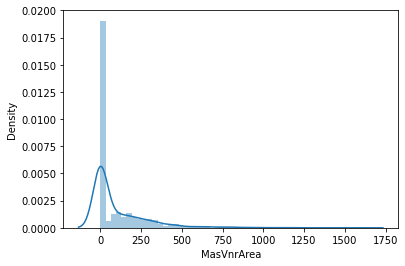

In [15]:
sns.distplot(df['MasVnrArea']);

The missing data columns can be seen having skewness in their distribution. Hence we will replace the missing values with the median. And since 'GarageYrBlt' column contains the year of built, we will replace its missing values with the most frequent data.

In [16]:
# Replacing the missing values

df['GarageYrBlt']= imp.fit_transform(df['GarageYrBlt'].values.reshape(-1,1))

df[num_fetrs]=df[num_fetrs].fillna(df[num_fetrs].median())

The null values have been removed, lets visualize it

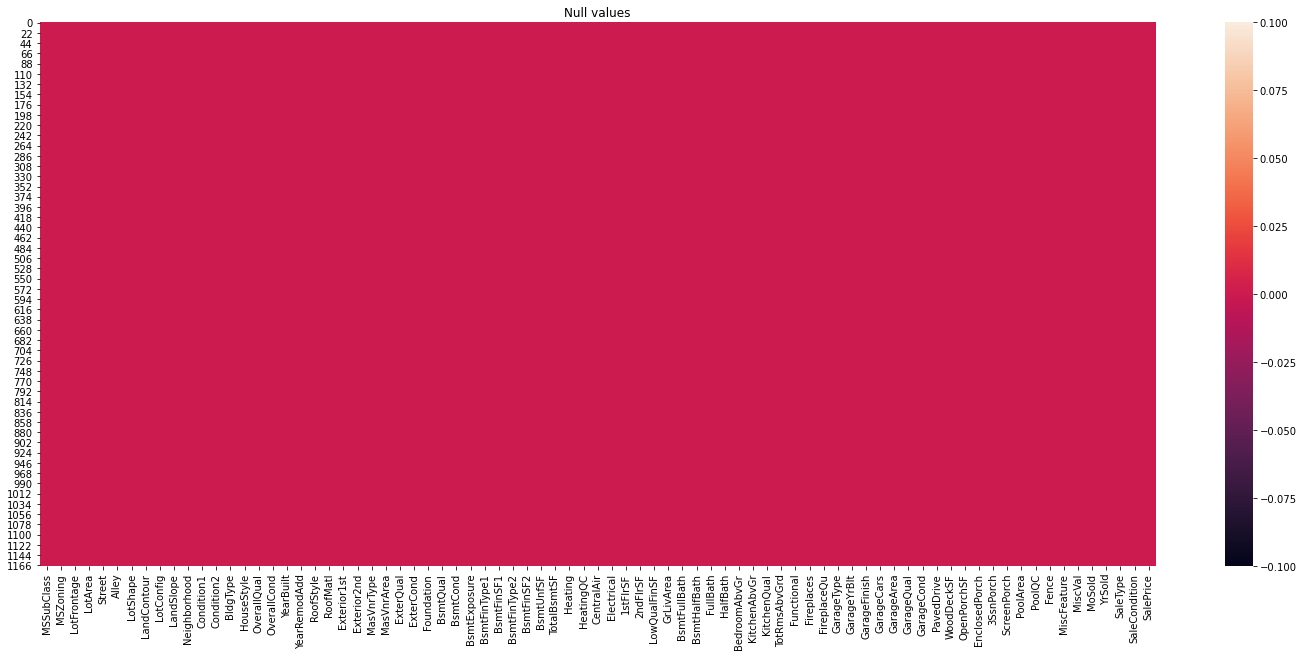

In [17]:
plt.figure(figsize=[25,10])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization, we can see no null values present in the dataset.

In [18]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1976,1976,1977.0,2007
1,1970,1970,1970.0,2007
2,1996,1997,1997.0,2007
3,1977,1977,1977.0,2010
4,1977,2000,1977.0,2009
...,...,...,...,...
1163,1967,1967,1970.0,2010
1164,1949,2003,2002.0,2009
1165,1976,1976,1976.0,2009
1166,1920,1950,1920.0,2008


We have these four features with the year. And training a model with the descrete year feature will have no impact in our model. Hence we will be extracting the 
number of years of the these features with respect to the 'year sold', which can then be used in our model. But the garage year build is not a key feature that people look for in a house, so we can drop that column.

In [19]:
df.drop(['GarageYrBlt'],axis=1, inplace=True)
num_fetrs.remove('GarageYrBlt')

In [20]:
years= ['YearBuilt','YearRemodAdd']

for i in df[years]:
    df[i]=df['YrSold']-df[i]

In [21]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.0,4928,Pave,Unavailable,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,Unavailable,Unavailable,Unavailable,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,Unavailable,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,Unavailable,Unavailable,Unavailable,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,Unavailable,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,Unavailable,Unavailable,Unavailable,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,Unavailable,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,Unavailable,MnPrv,Unavailable,0,1,2010,COD,Normal,190000
4,20,RL,70.0,16635,Pave,Unavailable,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,70.0,9819,Pave,Unavailable,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,43,43,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,Unavailable,Detchd,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,Unavailable,MnPrv,Unavailable,0,2,2010,WD,Normal,122000
1164,20,RL,67.0,8777,Pave,Unavailable,Reg,Lvl,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,60,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Unavailable,Unavailable,Unavailable,Unavailable,0,Unavailable,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,Unavailable,Detchd,Fin,2,520,TA,TA,N,0,96,0,0,0,0,Unavailable,MnPrv,Unavailable,0,5,2009,WD,Normal,108000
1165,160,RL,24.0,2280,Pave,Unavailable,Reg,Lvl,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,33,33,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,Unavailable,Unavailable,Unavailable,0,7,2009,WD,Normal,148500
1166,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,88,58,Gambrel,CompShg,BrkFace

In [22]:
df['YrSold'].nunique()

5

In the 'year sold' column, we can see that there are only 5 categorical years, we can encode this in further steps and use it in our model.

## Visualization

In [23]:
df[num_fetrs].nunique()

MSSubClass        15
LotFrontage      106
LotArea          892
OverallQual       10
OverallCond        9
YearBuilt        118
YearRemodAdd      62
MasVnrArea       283
BsmtFinSF1       551
BsmtFinSF2       122
BsmtUnfSF        681
TotalBsmtSF      636
1stFlrSF         669
2ndFlrSF         351
LowQualFinSF      21
GrLivArea        746
BsmtFullBath       4
BsmtHalfBath       3
FullBath           4
HalfBath           3
BedroomAbvGr       8
KitchenAbvGr       4
TotRmsAbvGrd      12
Fireplaces         4
GarageCars         5
GarageArea       392
WoodDeckSF       244
OpenPorchSF      176
EnclosedPorch    106
3SsnPorch         18
ScreenPorch       65
PoolArea           8
MiscVal           20
MoSold            12
YrSold             5
SalePrice        581
dtype: int64

As we can see there are many discrete numeric features. First we seperate the discrete numeric columns and the continious numeric columns to visualize them differently.

In [24]:
disc_fetrs=['MSSubClass','OverallQual','OverallCond','LowQualFinSF','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','MoSold','YrSold']

num_fetrs= [word for word in num_fetrs if word not in disc_fetrs]

In [25]:
df[num_fetrs].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,70.807363,10484.749144,36.874144,23.046233,101.696918,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,1525.066781,476.860445,96.206336,46.559932,23.015411,181477.005993
std,22.440317,8957.442311,30.193130,20.783486,182.218483,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,528.042957,214.466769,126.158988,66.381023,63.191089,79105.586863
min,21.000000,1300.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7621.500000,8.000000,4.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,1143.250000,338.000000,0.000000,0.000000,0.000000,130375.000000
50%,70.000000,9522.500000,36.000000,14.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,1468.500000,480.000000,0.000000,24.000000,0.000000,163995.000000
75%,79.250000,11515.500000,54.000000,42.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,1795.000000,576.000000,171.000000,70.000000,0.000000,215000.000000
max,313.000000,164660.000000,135.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,755000.000000


Here we can check the data description of the continious numeric columns, We can see that the values of mean and median in some of the features are far away from each other, which signifies that the data in those features may have skewness present in them. Also we can see that some columns have a large difference between the mean and the maximum value, which means that the data in those columns are more prone to outliers.

<function matplotlib.pyplot.show(*args, **kw)>

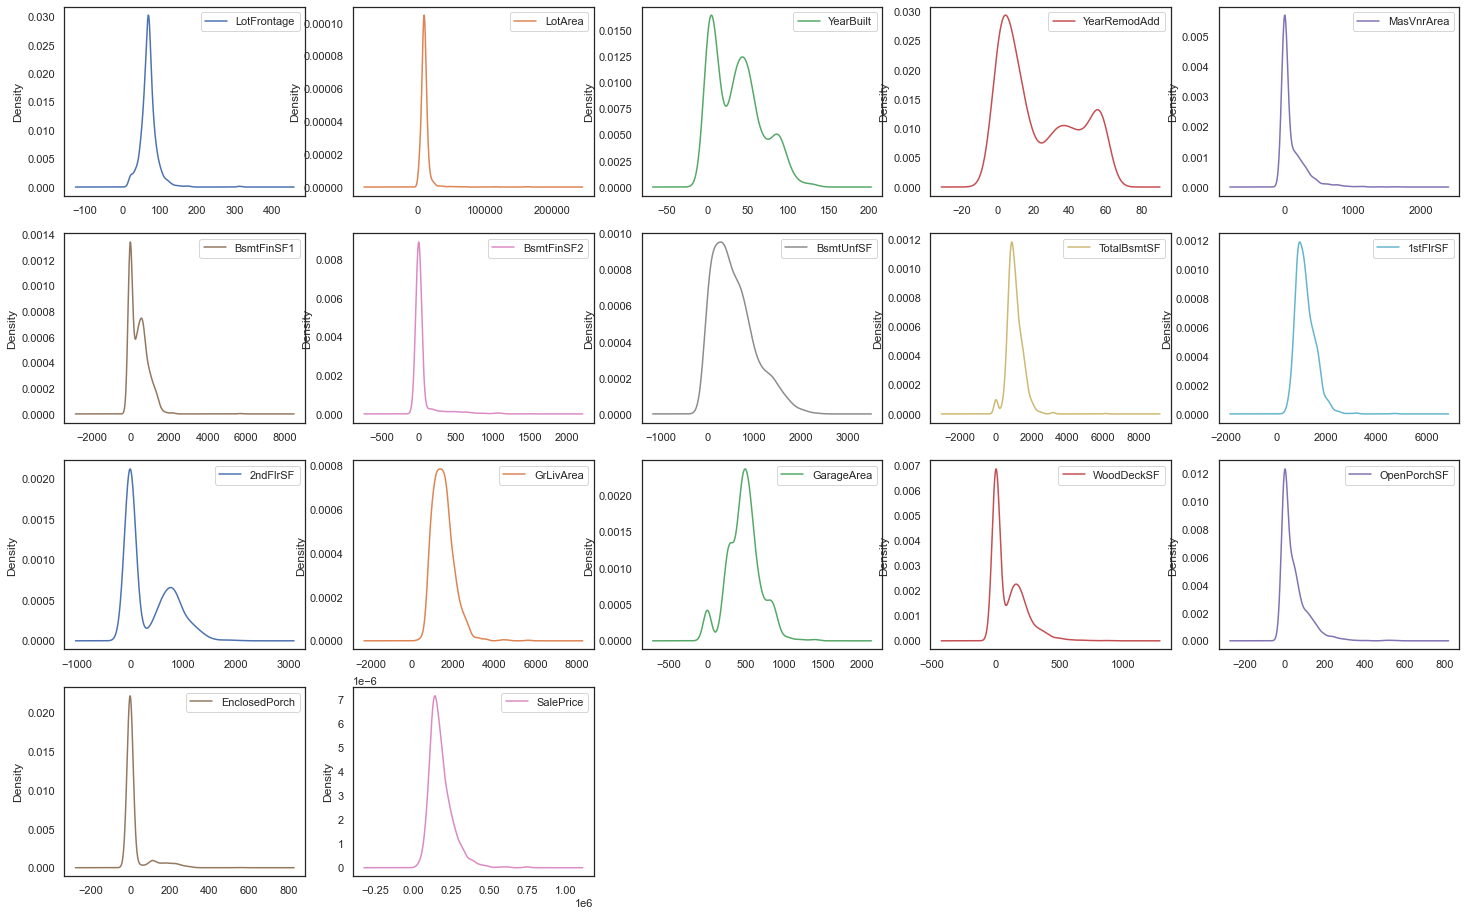

In [128]:
# Visualizing the distribution of continious numeric data

df[num_fetrs].plot(kind='density', subplots= True, layout=(4,5), sharex=False, legend=True, figsize=[25,16])
plt.show

Here, we can check the distribution of all our numeric continious columns. lets inspect closely.

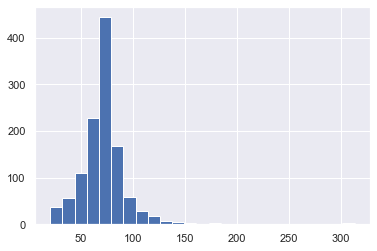

In [153]:
sns.set(style='darkgrid')
plt.hist(df['LotFrontage'], bins=25)
plt.show()

Data is normally distrubuted at the start and has some skewness at the end.

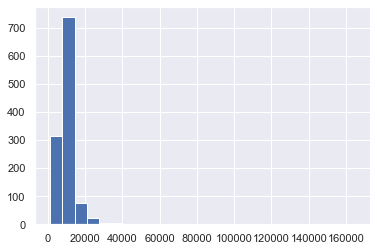

In [140]:
plt.hist(df['LotArea'], bins=25)
plt.show()

A lot of skewness can be seen here as well, right tailed skewed.

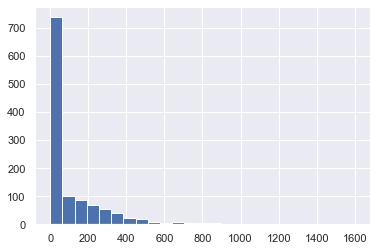

In [141]:
plt.hist(df['MasVnrArea'], bins=25)
plt.show()

Here as well, the data distribution is very much skewed.

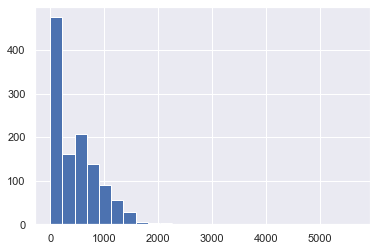

In [142]:
plt.hist(df['BsmtFinSF1'], bins=25)
plt.show()

Right tailed skewed data distribution

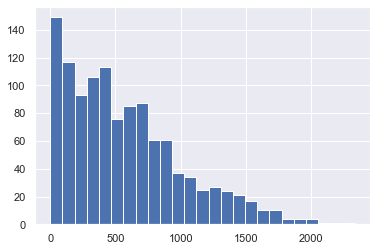

In [143]:
plt.hist(df['BsmtUnfSF'], bins=25)
plt.show()

Data distribution can be seen gradually descreasing. which signifies skewness.

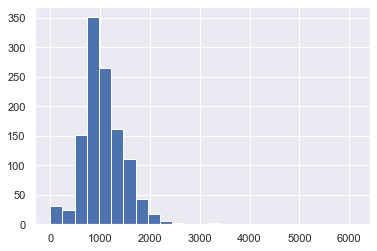

In [144]:
plt.hist(df['TotalBsmtSF'], bins=25)
plt.show()

A normal distribution at the start. and some skewness is present at the end.

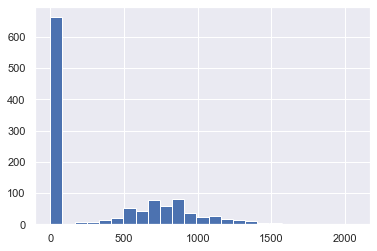

In [145]:
plt.hist(df['2ndFlrSF'], bins=25)
plt.show()

Here we can see the majority of data being 0. and the rest of the data are some what normally distributed.

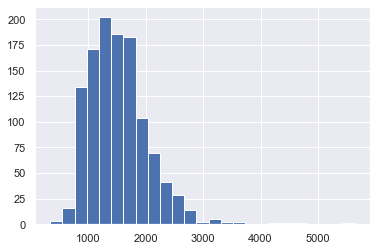

In [146]:
plt.hist(df['GrLivArea'], bins=25)
plt.show()

The data here has some variance in it. also some skewness can be seen.

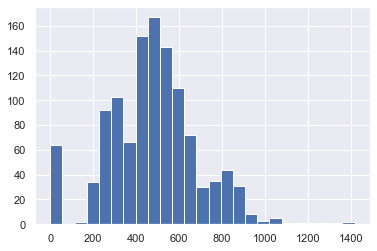

In [147]:
plt.hist(df['GarageArea'], bins=25)
plt.show()

Data distribution here is close to a normal distribution, with little varaince present.

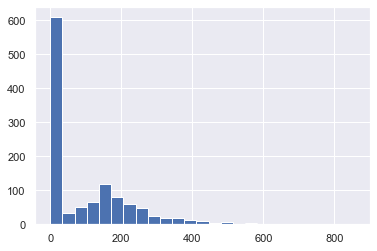

In [148]:
plt.hist(df['WoodDeckSF'], bins=25)
plt.show()

Here the majority of data are 0 and at the end some skewness can be seen.

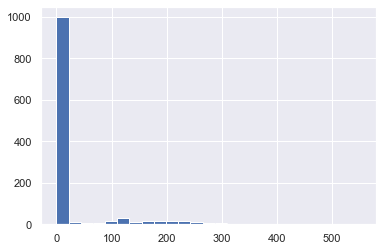

In [149]:
plt.hist(df['EnclosedPorch'], bins=25)
plt.show()

The data distribution here is very much skewed, right tailed skewed.

### Encoding the categorical features

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

We can see that we have many object type data which are categorical in nature, we need to encode them so that they can be used in our model.

In [26]:
qual_fetrs=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

label={'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'Unavailable':5}

for i in df[qual_fetrs]:
    df[i]= df[i].map(label)

In the above code, we are manually encoding the features containing the quality of that feature by mapping the labels to its categories,
this is done manually because by using label encoder, the label were not in ordinal manner.

In [27]:
# encoding the rest of the object type data.

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
for i in df[catg_fetrs]:
    if df[i].dtypes== 'O':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
# we need to encode the 'year sold' column as well, as it contains five categorical years

df['YrSold']= enc.fit_transform(df['YrSold'].values.reshape(-1,1))

In [28]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.0,4928,1,2,0,3,4,0,13,2,2,4,2,6,5,31,31,1,1,8,9,2,0.0,2,2,1,1,2,3,0,120,6,0,958,1078,1,2,1,4,958,0,0,958,0,0,2,0,2,1,2,5,6,1,2,1,1,2,440,2,2,2,0,205,0,0,0,0,5,4,4,0,2,1,8,4,128000
1,20,3,95.0,15865,1,2,0,3,4,1,12,2,2,0,2,8,6,37,37,0,5,12,13,2,0.0,1,1,2,2,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,1,8,6,1,2,1,3,2,621,2,2,2,81,207,0,0,224,0,5,4,4,0,10,1,8,4,268000
2,60,3,92.0,9920,1,2,0,3,1,0,15,2,2,0,5,7,5,11,10,1,1,7,7,2,0.0,1,2,2,1,2,0,2,862,6,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,2,8,6,1,2,1,3,2,455,2,2,2,180,130,0,0,0,0,5,4,4,0,6,1,8,4,269790
3,20,3,105.0,11751,1,2,0,3,4,0,14,2,2,0,2,6,6,33,33,3,1,8,9,1,480.0,2,2,1,1,2,3,1,705,6,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,2,7,6,1,2,1,1,2,546,2,2,2,0,122,0,0,0,0,5,2,4,0,1,4,0,4,190000
4,20,3,70.0,16635,1,2,0,3,2,0,14,2,2,0,2,6,7,32,9,1,1,4,4,3,126.0,1,2,1,1,2,3,0,1246,6,0,356,1602,1,1,1,4,1602,0,0,1602,0,1,2,0,3,1,1,8,6,1,2,1,0,2,529,2,2,2,240,0,0,0,0,0,5,4,4,0,6,3,8,4,215000


The dataset has been encoded, we can now proceed.

### Checking Correlation Coefficient

In [29]:
cor= df.corr()
cor

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.007478,-0.336234,-0.124151,-0.035981,-0.141808,0.104485,-0.021387,0.076880,-0.014930,0.013918,-0.042474,-0.044319,0.731815,0.381585,0.070462,-0.056978,-0.025650,-0.059092,-0.100641,-0.032214,-0.090178,-0.120022,-0.013252,0.028215,-0.032564,0.051385,0.053951,-0.049560,0.012876,-0.065262,0.020799,-0.052236,0.044998,-0.062403,-0.134170,-0.214042,0.047734,-0.005480,-0.113883,0.045533,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,-0.019462,0.051179,0.022913,-0.035792,0.025551,0.123336,-0.009696,-0.027639,-0.092408,0.080630,0.098128,-0.068702,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.016249,0.112138,0.048646,-0.023503,-0.016015,-0.038595,0.035050,-0.028981,-0.060775
MSZoning,0.007478,1.000000,-0.069476,-0.023328,0.140215,-0.051864,0.053655,0.001175,-0.027246,-0.023952,-0.251833,-0.025651,0.031959,-0.024776,-0.110991,-0.134037,0.189553,0.299038,0.174282,0.000913,0.009719,-0.012037,0.005548,-0.033521,-0.059170,0.160447,-0.097907,-0.244844,0.157039,0.019152,0.036035,0.026627,-0.034161,-0.031404,0.027055,-0.032638,-0.058896,0.051188,0.149446,-0.015887,-0.079205,-0.033095,-0.048968,0.012098,-0.064125,-0.007287,0.006345,-0.188837,-0.121209,-0.001906,0.026744,0.133170,-0.031062,-0.091684,0.010658,-0.003571,0.135666,0.179593,-0.126031,-0.168364,0.066008,0.058544,-0.077280,-0.004509,-0.152694,0.111221,0.004409,0.030793,-0.001663,0.001604,-0.070105,0.010802,0.003416,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.336234,-0.069476,1.000000,0.296790,-0.035131,0.132906,-0.138975,-0.073725,-0.189317,0.044283,0.066073,-0.026488,0.010896,-0.402558,0.055345,0.229981,-0.047851,-0.112006,-0.089787,0.146568,0.081703,0.088520,0.111287,-0.032509,0.188273,-0.159338,0.002479,0.090649,-0.147643,-0.055641,-0.126039,-0.031778,0.227732,-0.001780,0.001253,0.115628,0.356180,-0.026282,-0.090268,0.076291,0.066544,0.402864,0.089816,0.008087,0.374000,0.092807,0.001375,0.171842,0.047149,0.236946,-0.002082,-0.164053,0.318941,0.039337,0.228494,-0.214085,-0.256781,-0.190088,0.260224,0.322750,-0.113626,-0.110026,0.091761,0.087267,0.151044,0.021103,0.050499,0.030440,0.195973,-0.251685,-0.052882,0.005634,-0.002830,0.022579,-0.004162,-0.036081,0.065439,0.323851
LotArea,-0.124151,-0.023328,0.296790,1.000000,-0.263973,0.073073,-0.189201,-0.159038,-0.152063,0.395410,0.010707,0.029520,0.040096,-0.215345,-0.040637,0.107188,0.017513,-0.007056,-0.029495,0.038615,0.194142,0.048265,0.027328,-0.005204,0.120192,-0.055140,-0.027246,-0.021195,-0.075906,-0.039636,-0.136699,-0.056987,0.221851,-0.083562,0.056656,0.006600,0.259733,-0.020394,-0.018882,0.051182,0.050388,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,-0.080270,0.184546,-0.033165,0.285983,-0.194199,-0.160511,-0.096075,0.158313,0.195162,-0.087221,-0.085084,0.021907,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,-0.114614,0.030193,-0.146562,0.051679,0.015141,-0.035399,0.005421,0.034236,0.249499
Street,-0.035981,0.140215,-0.035131,-0.263973,1.000000,-0.014759,-0.012941,0.105226,0.000153,-0.141572,0.001420,0.002189,0.001406,-0.013606,0.016793,0.057140,0.031082,-0.0

Here we can see the correlation between all the features, lets visualize it for a better understanding.

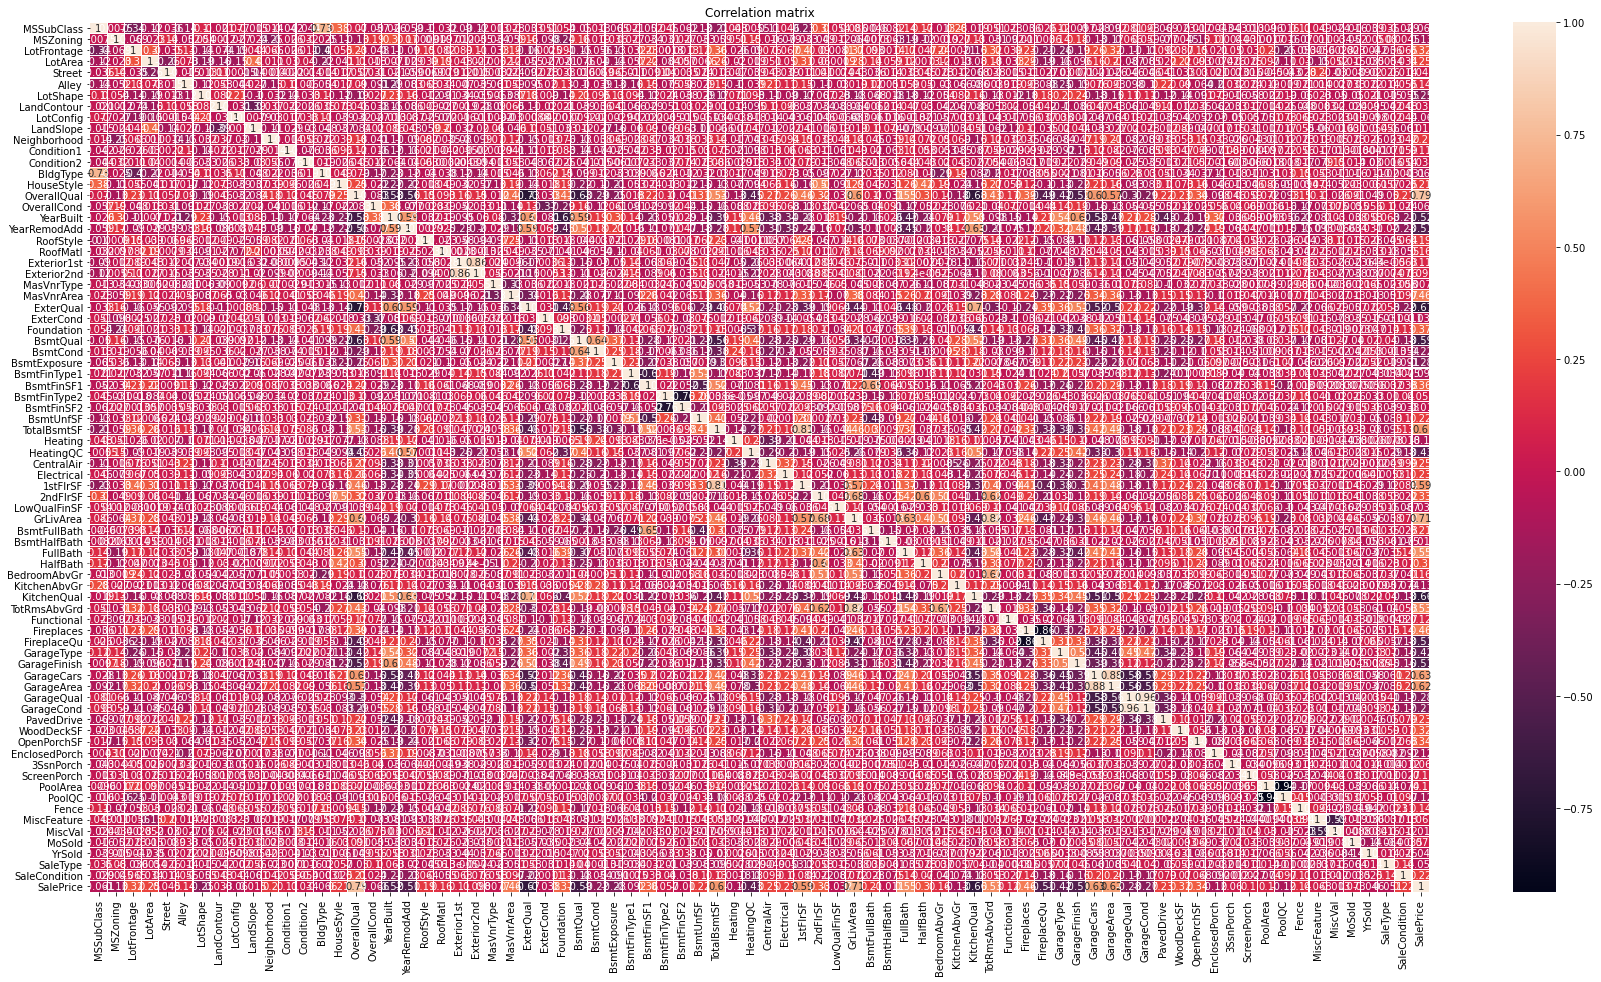

In [116]:
plt.figure(figsize=[30,16])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

Here we can see a mix of positive and negative correlations, with majority of it being near 25% correlation. Lets check the correlation 
of the target with the independent columns.

In [117]:
pd.set_option('display.max_rows',90)
cor['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
MasVnrArea       0.460535
Fireplaces       0.459611
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
Fence            0.143922
Alley            0.136664
Functional       0.118673
Exterior1st      0.108451
Condition1       0.105820
PoolArea         0.103280
ScreenPorch      0.100284
Exterior2nd      0.097541
MoSold      

Here we can check the correlation of one of our target with the independent columns. lets visualize it.

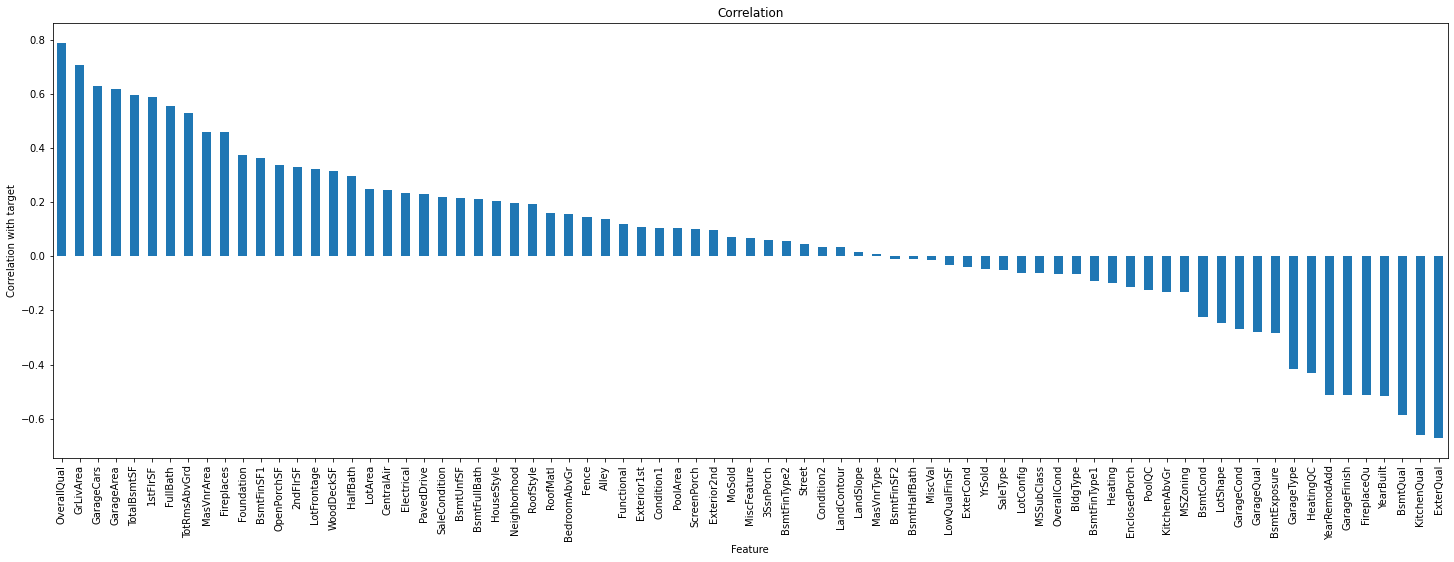

In [118]:
plt.figure(figsize=(25,8))
cor['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

The visualization shows that the Overall quality has the highest correlation with the target. and the Basement quality is showing the most negative relation. the feature Masonry veneer type has very little correlation with our target.Lets inspect closely.

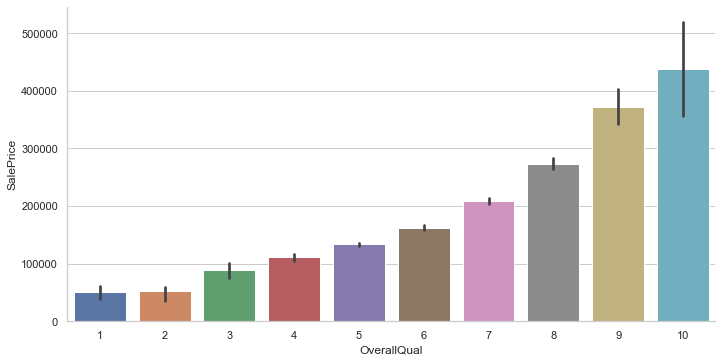

In [30]:
sns.set(style='whitegrid')
sns.catplot(x='OverallQual',y='SalePrice', data=df, kind='bar', aspect=2);

We have a very nice positive correlation between the columns, we can see as the house quality increases, the price also gradually increases.

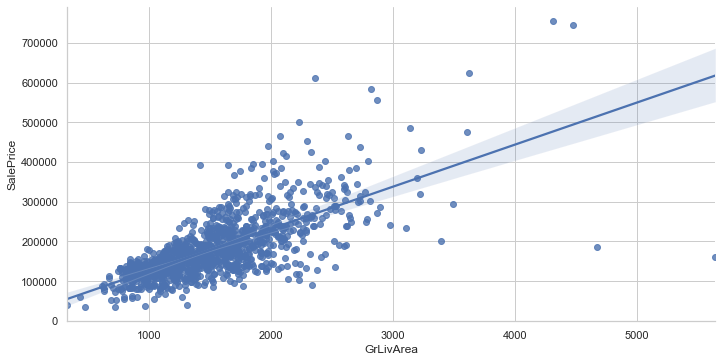

In [165]:
sns.lmplot(x ='GrLivArea', y ='SalePrice', data = df, aspect=2);

We can see the trend here as well, with the increase in ground living area, the sale price also increases.

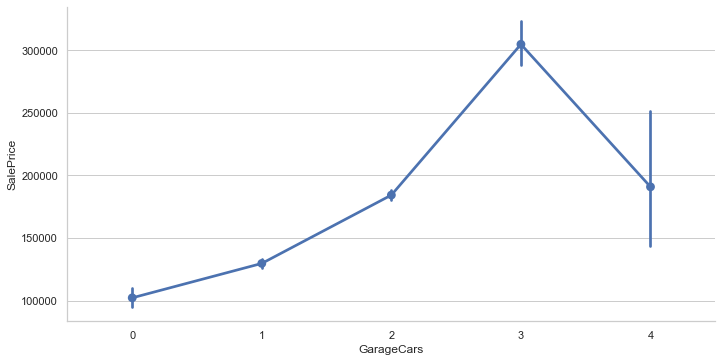

In [31]:
sns.factorplot(x ='GarageCars', y ='SalePrice', data = df, aspect=2);

We can see a positive relation here, but upto a certain point. as the garage car capacity increases till 3, the sale price gradually increases too, but when the car capacity increases to 4, the sale price descreases.

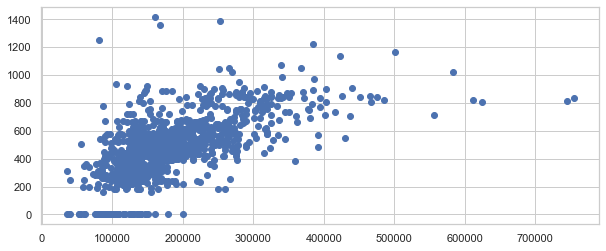

In [57]:
plt.figure(figsize=(10,4))
plt.scatter(df['SalePrice'],df['GarageArea'])
plt.show()

Here we can see a certain positive correlation as well between the columns.

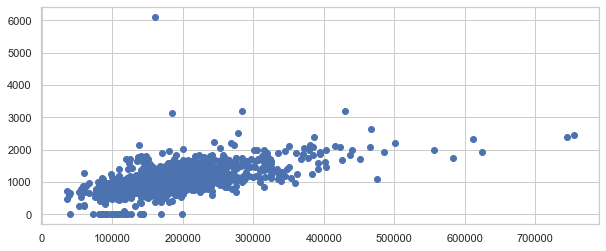

In [56]:
plt.figure(figsize=(10,4))
plt.scatter(df['SalePrice'],df['TotalBsmtSF'])
plt.show()

The basement surface area shows a good positive correlation with the target.

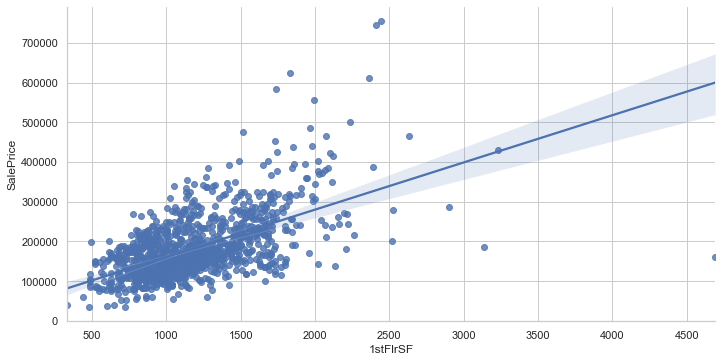

In [52]:
sns.lmplot(x ='1stFlrSF',y ='SalePrice', data = df, aspect=2);

It shows that the size of the first floor also plays a positive impact on the sale price.

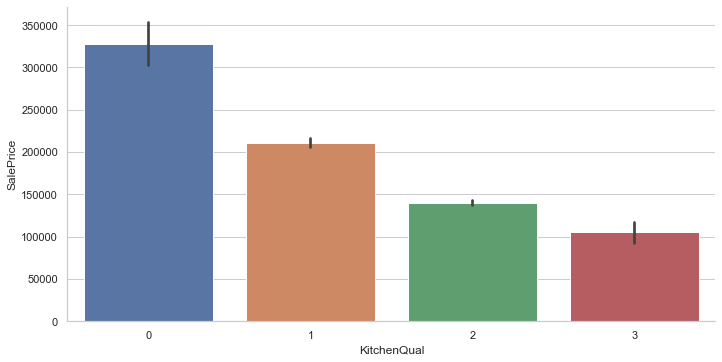

In [32]:
sns.catplot(x='KitchenQual',y='SalePrice', data=df, kind='bar', aspect=2);

The graph shows the line going down, but the kitchen quality has a positive relation with the sale price, as the label 0 signifies 
excelent quality. hence as the quality becomes better, the price also increases.

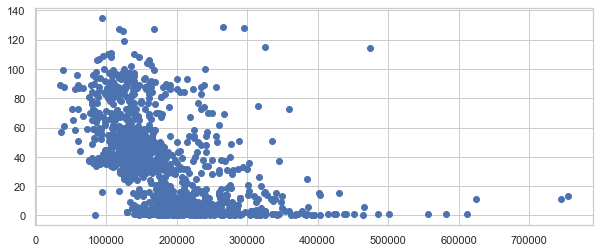

In [33]:
plt.figure(figsize=(10,4))
plt.scatter(df['SalePrice'],df['YearBuilt'])
plt.show()

Here we can see some negative correlation between the columns, it shows that if the number of years of built is less, the price of the house increases.

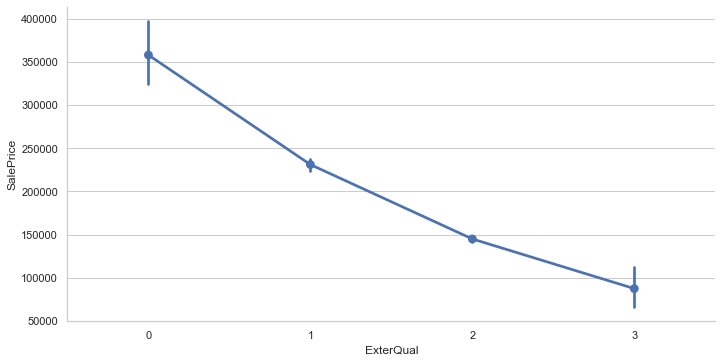

In [34]:
sns.factorplot(x ='ExterQual', y ='SalePrice', data = df, aspect=2);

Here the graph shows that for materials on the exterior, the price goes down as the quality descreases, as 0 signifies excellent quality and 3 if for poor quality.

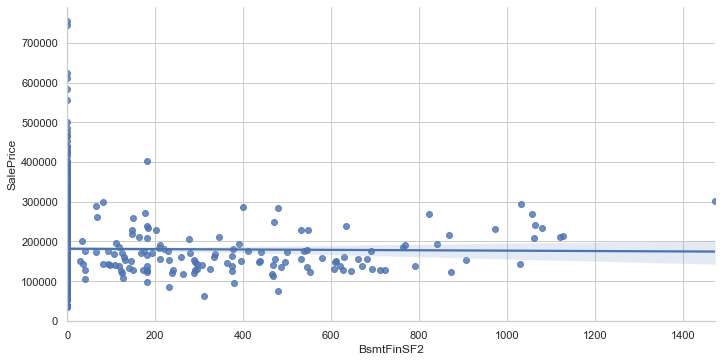

In [35]:
sns.lmplot(x ='BsmtFinSF2',y ='SalePrice', data = df, aspect=2);

The graph shows that there is no correlation between the 'BsmtFinSF2' column and the target.

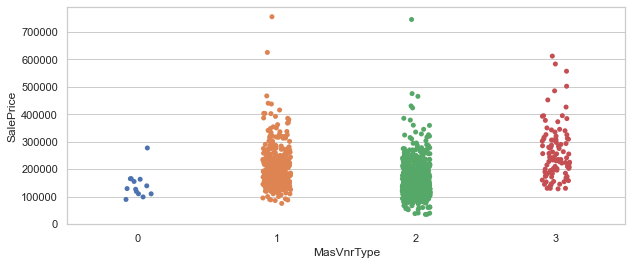

In [36]:
plt.figure(figsize=[10,4])
sns.stripplot(data= df, x='MasVnrType', y='SalePrice')
plt.show()

We can see that Masonry veneer type has near 0 correlation with the target.

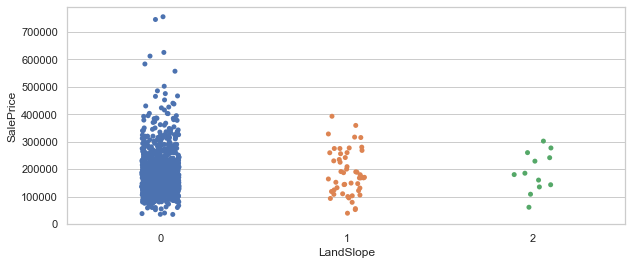

In [37]:
plt.figure(figsize=[10,4])
sns.stripplot(data= df, x='LandSlope', y='SalePrice')
plt.show()

No correlation can be seen here as well, as all the categories fall under the same price range.

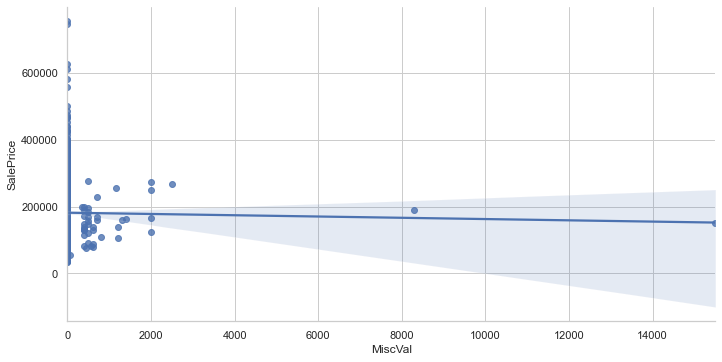

In [38]:
sns.lmplot(x ='MiscVal',y ='SalePrice', data = df, aspect=2);

The graph shpws that there is no correlation between the two columns.

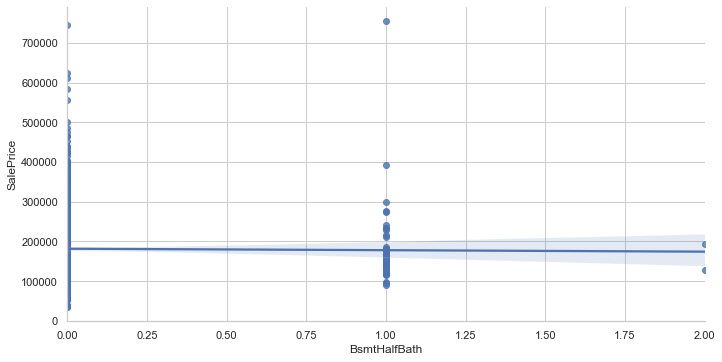

In [39]:
sns.lmplot(x ='BsmtHalfBath',y ='SalePrice', data = df, aspect=2);

No correlation can be seen here as well.

The above five features showed no correlation with the target, hence it will be better to exclude them from building the model, as these features will have no impact on the model performance. Lets drop the features.

In [30]:
df.drop(['BsmtHalfBath','MiscVal','LandSlope','MasVnrType','BsmtFinSF2'],axis=1, inplace = True )
num_fetrs.remove('BsmtFinSF2')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,3,70.0,4928,1,2,0,3,4,13,2,2,4,2,6,5,31,31,1,1,8,9,0.0,2,2,1,1,2,3,0,120,6,958,1078,1,2,1,4,958,0,0,958,0,2,0,2,1,2,5,6,1,2,1,1,2,440,2,2,2,0,205,0,0,0,0,5,4,4,2,1,8,4,128000
1,20,3,95.0,15865,1,2,0,3,4,12,2,2,0,2,8,6,37,37,0,5,12,13,0.0,1,1,2,2,1,1,0,351,4,1043,2217,1,0,1,4,2217,0,0,2217,1,2,0,4,1,1,8,6,1,2,1,3,2,621,2,2,2,81,207,0,0,224,0,5,4,4,10,1,8,4,268000
2,60,3,92.0,9920,1,2,0,3,1,15,2,2,0,5,7,5,11,10,1,1,7,7,0.0,1,2,2,1,2,0,2,862,6,255,1117,1,0,1,4,1127,886,0,2013,1,2,1,3,1,2,8,6,1,2,1,3,2,455,2,2,2,180,130,0,0,0,0,5,4,4,6,1,8,4,269790
3,20,3,105.0,11751,1,2,0,3,4,14,2,2,0,2,6,6,33,33,3,1,8,9,480.0,2,2,1,1,2,3,1,705,6,1139,1844,1,0,1,4,1844,0,0,1844,0,2,0,3,1,2,7,6,1,2,1,1,2,546,2,2,2,0,122,0,0,0,0,5,2,4,1,4,0,4,190000
4,20,3,70.0,16635,1,2,0,3,2,14,2,2,0,2,6,7,32,9,1,1,4,4,126.0,1,2,1,1,2,3,0,1246,6,356,1602,1,1,1,4,1602,0,0,1602,0,2,0,3,1,1,8,6,1,2,1,0,2,529,2,2,2,240,0,0,0,0,0,5,4,4,6,3,8,4,215000


### Checking Outliers

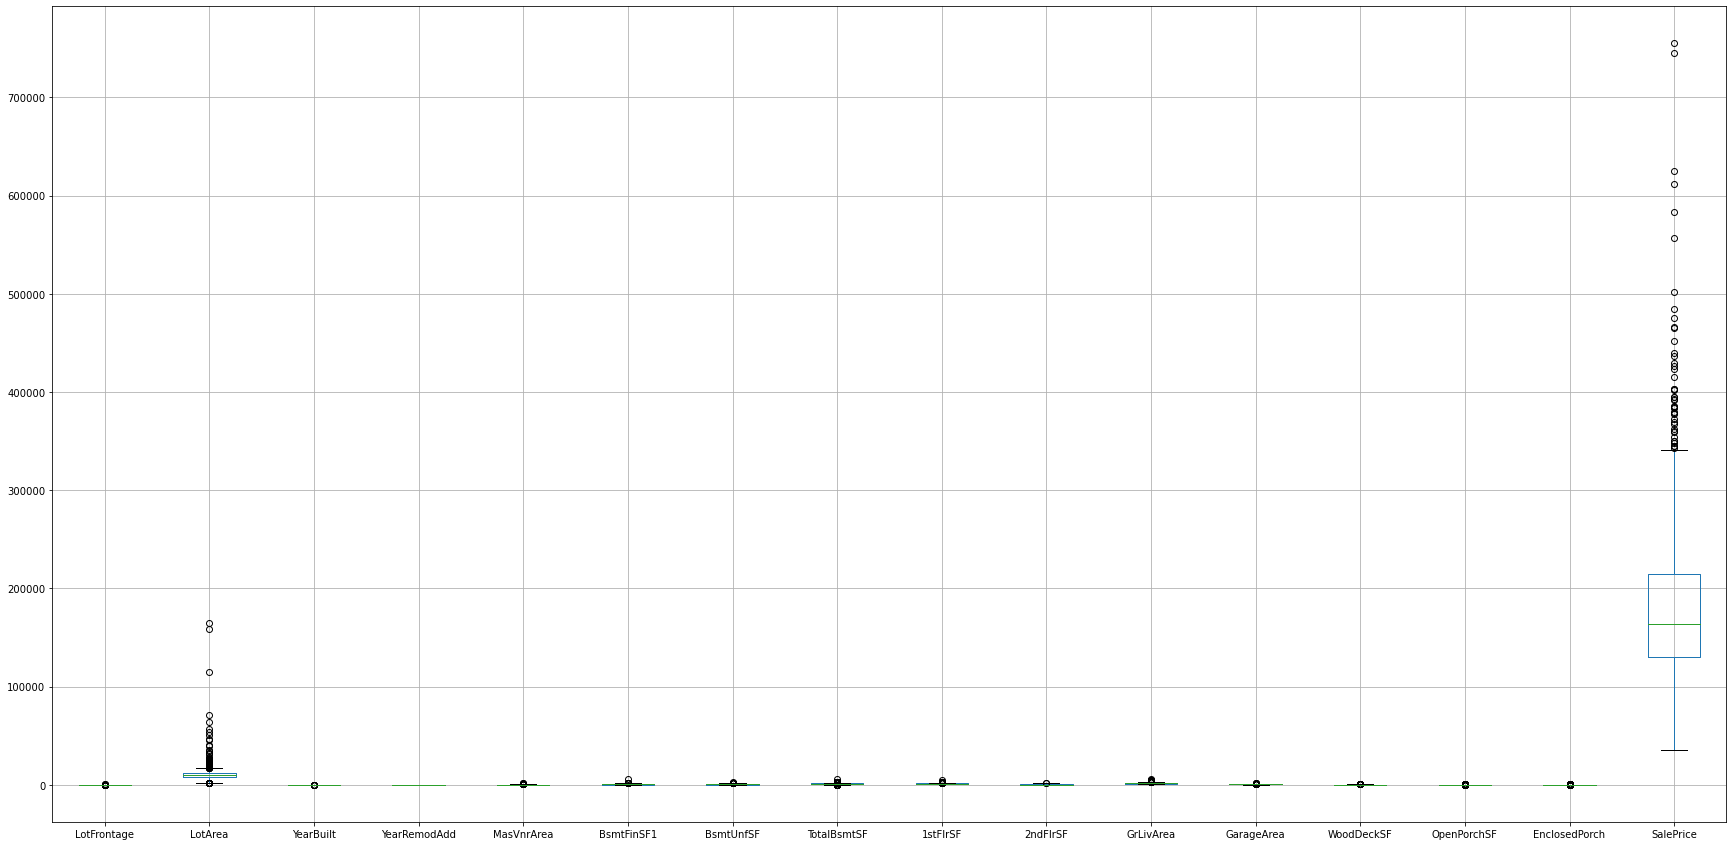

In [154]:
df[num_fetrs].boxplot(figsize=[30,15])
plt.show()

Some outliers can be seen, lets inspect closely.

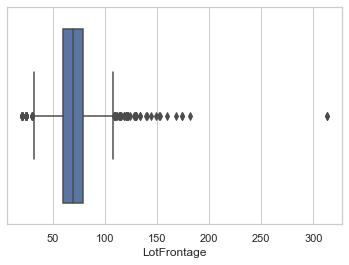

In [41]:
sns.boxplot(df['LotFrontage']);

Some outliers can be seen here, one far away from the threhold.

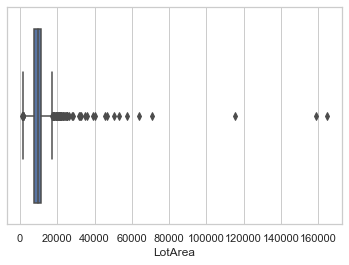

In [42]:
sns.boxplot(df['LotArea']);

The feature also has some outliers present in it, some far away.

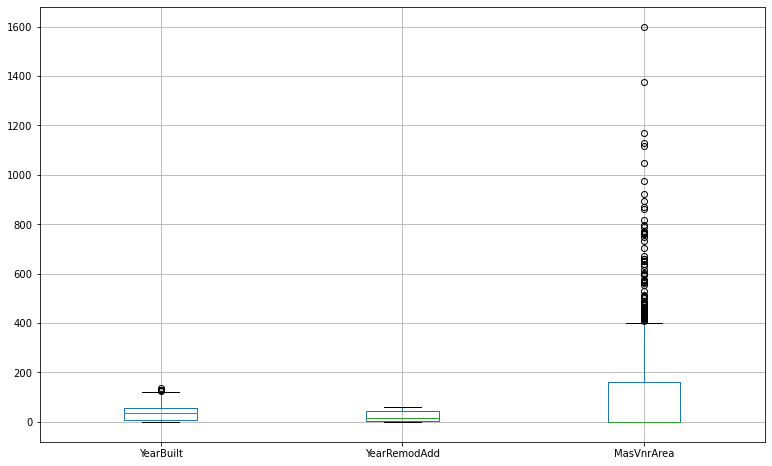

In [163]:
df[num_fetrs].iloc[:,2:5].boxplot(figsize=[13,8])
plt.show()

The feature year built has few outliers, but are very close to the threshold. the year remodeled feature contains no outliers and the 
feature Masvnrarea can be seen having many outliers present in it.

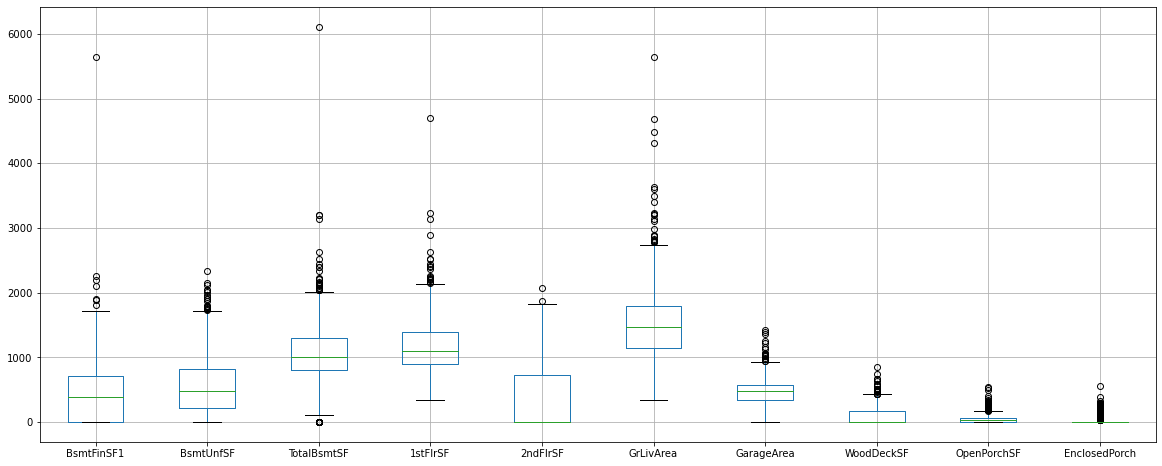

In [164]:
df[num_fetrs].iloc[:,5:15].boxplot(figsize=[20,8])
plt.show()

We can see that the rest of the continious numeric columns also have outliers present in them,
but most of the features have the outliers close to the threshold. 

In [32]:
# Removing the outliers.

from scipy.stats import zscore

z= np.abs(zscore(df[num_fetrs]))

df_new= df[(z<3).all(axis=1)] # we gave a threshold of 3.
df_new.shape

(1030, 73)

In [33]:
loss=(1168-1035)/1168*100
loss

11.386986301369863

Using z score the data loss is more than 10%, which is high. lets try different approach.

In [34]:
q1= df[num_fetrs].quantile(0.37)
q3= df[num_fetrs].quantile(0.60)
iqr= q3-q1

In [35]:
new= df[((df<(q1-(1.5*iqr))) | (df>(q3+(1.5*iqr)))).any(axis=1)]
new.shape

(1115, 73)

In [36]:
loss=(1168-1115)/1168*100
loss

4.537671232876712

Using IQR, now the data loss is less than 5%, whcih is okay. we can now proceed.

### Checking Skewness

In [37]:
new[num_fetrs].skew()

LotFrontage       2.662249
LotArea          10.424696
YearBuilt         0.550429
YearRemodAdd      0.505773
MasVnrArea        2.762956
BsmtFinSF1        1.888649
BsmtUnfSF         0.903067
TotalBsmtSF       1.692733
1stFlrSF          1.473829
2ndFlrSF          0.837964
GrLivArea         1.436549
GarageArea        0.180793
WoodDeckSF        1.490772
OpenPorchSF       2.364141
EnclosedPorch     2.953478
SalePrice         1.914211
dtype: float64

Some skewness can be seen in the continious numeric data. we need to treat them. hence we will be using log transformation technique to minimize the skewness in the data.

In [38]:
for i in new[num_fetrs]:
    if 0 in new[i].unique():
        pass;
    else:
        new[i]=np.log(new[i].values.reshape(-1,1))

new[num_fetrs].skew()

LotFrontage     -0.807950
LotArea         -0.172160
YearBuilt        0.550429
YearRemodAdd     0.505773
MasVnrArea       2.762956
BsmtFinSF1       1.888649
BsmtUnfSF        0.903067
TotalBsmtSF      1.692733
1stFlrSF         0.054367
2ndFlrSF         0.837964
GrLivArea       -0.022308
GarageArea       0.180793
WoodDeckSF       1.490772
OpenPorchSF      2.364141
EnclosedPorch    2.953478
SalePrice        0.057400
dtype: float64

The skewness for the majority of the columns is minimised, we have applied log transformation on the target column as well, as it improves the model performance drasticaly(known by hit and trial). lets proceed.

### Scaling

In [39]:
# First lets split the data into target and features.

x= new.drop(['SalePrice'], axis=1)
y= new['SalePrice']

In [40]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,1.483504,-0.033901,0.112207,-1.193285,0.060003,0.258065,-1.383051,0.320774,0.604156,0.140070,-0.038700,-0.024543,2.913566,-0.533287,-0.085754,-0.528500,-0.210250,0.382716,-0.494879,-0.137793,-0.217805,-0.103385,-0.575741,0.701479,0.225873,-0.542935,-0.585790,-0.120587,0.598870,-1.400847,-0.700954,0.349423,0.843014,0.022284,-0.121928,1.187188,0.274257,0.303283,-0.492491,-0.791233,-0.128412,-1.251124,-0.811970,0.782423,-0.760973,-1.065688,-0.215039,0.790149,-0.967770,0.267714,0.572969,-0.632883,-0.778399,-0.521415,0.300534,-0.171579,-0.26929,-0.273923,0.299290,-0.764210,2.333041,-0.374117,-0.12816,-0.273694,-0.078661,0.075845,0.470098,0.195159,-1.602508,-0.619371,0.329465,0.208269
1,-0.879337,-0.033901,1.061111,1.071811,0.060003,0.258065,-1.383051,0.320774,0.604156,-0.026077,-0.038700,-0.024543,-0.412389,-0.533287,1.341350,0.351019,-0.013389,0.670107,-1.678978,5.946932,1.070537,1.046480,-0.575741,-1.017530,-2.541686,0.851933,0.538402,-1.866752,-1.106725,-1.400847,-0.206674,-1.312013,1.030207,2.553794,-0.121928,-0.899045,0.274257,0.303283,2.133234,-0.791233,-0.128412,1.267681,1.102081,0.782423,-0.760973,1.342098,-0.215039,-0.700572,0.891616,0.267714,0.572969,-0.632883,-0.778399,1.095770,0.300534,0.656844,-0.26929,-0.273923,0.299290,-0.129856,2.362694,-0.374117,-0.12816,3.785556,-0.078661,0.075845,0.470098,0.195159,1.360670,-0.619371,0.329465,0.208269
2,0.065799,-0.033901,0.961404,0.162112,0.060003,0.258065,-1.383051,0.320774,-1.218118,0.472364,-0.038700,-0.024543,-0.412389,1.045337,0.627798,-0.528500,-0.866452,-0.623154,-0.494879,-0.137793,-0.539890,-0.678317,-0.575741,-1.017530,0.225873,0.851933,-0.585790,-0.120587,-1.959522,-0.494847,0.886734,0.349423,-0.705187,0.108964,-0.121928,-0.899045,0.274257,0.303283,0.015925,1.216378,-0.128412,0.977909,1.102081,0.782423,1.221469,0.138205,-0.215039,0.790149,0.891616,0.267714,0.572969,-0.632883,-0.778399,1.095770,0.300534,-0.102925,-0.26929,-0.273923,0.299290,0.645466,1.221085,-0.374117,-0.12816,-0.273694,-0.078661,0.075845,0.470098,0.195159,-0.120919,-0.619371,0.329465,0.208269
3,-0.879337,-0.033901,1.372097,0.490268,0.060003,0.258065,-1.383051,0.320774,0.604156,0.306217,-0.038700,-0.024543,-0.412389,-0.533287,-0.085754,0.351019,-0.144629,0.478513,1.873319,-0.137793,-0.217805,-0.103385,2.018395,0.701479,0.225873,-0.542935,-0.585790,-0.120587,0.598870,-0.947847,0.550794,0.349423,1.241626,1.724774,-0.121928,-0.899045,0.274257,0.303283,1.556751,-0.791233,-0.128412,0.714673,-0.811970,0.782423,-0.760973,0.138205,-0.215039,0.790149,0.271820,0.267714,0.572969,-0.632883,-0.778399,-0.521415,0.300534,0.313575,-0.26929,-0.273923,0.299290,-0.764210,1.102476,-0.374117,-0.12816,-0.273694,-0.078661,0.075845,-1.324968,0.195159,-1.972905,1.637487,-4.634766,0.208269
4,-0.879337,-0.033901,0.112207,1.163628,0.060003,0.258065,-1.383051,0.320774,-0.610693,0.306217,-0.038700,-0.024543,-0.412389,-0.533287,-0.085754,1.230538,-0.177440,-0.671052,-0.494879,-0.137793,-1.506147,-1.540715,0.105220,-1.017530,0.225873,-0.542935,-0.585790,-0.120587,0.598870,-1.400847,1.708394,0.349423,-0.482757,1.186912,-0.121928,0.144072,0.274257,0.303283,1.116499,-0.791233,-0.128412,0.292348,-0.811970,0.782423,-0.760973,0.138205,-0.215039,-0.700572,0.891616,0.267714,0.572969,-0.6

### Feature Selection

In [41]:
# importing required libraries

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [94]:
fetr_sel= SelectFromModel(Lasso(alpha=0.007, random_state=4))
fetr_sel.fit(x,y)

selected= x.columns[(fetr_sel.get_support())]
len(selected)

32

Here we are using embedded method for the feature selection and we have used Lasso regularization model to select the best performing features, keeping the alpha value as '0.007', which then gave us 32 best scoring features from the dataset.

In [95]:
x=x[selected]
x.head()

,LotArea,Street,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageCond,PavedDrive,WoodDeckSF,ScreenPorch,PoolQC,SaleCondition
0,-1.193285,0.060003,-0.024543,-0.085754,-0.528500,-0.210250,0.382716,0.701479,-0.542935,-0.585790,0.598870,-1.400847,1.187188,0.274257,-0.492491,-1.251124,-0.811970,0.782423,-0.760973,-0.215039,0.790149,0.267714,0.572969,-0.632883,-0.521415,0.300534,-0.273923,0.29929,-0.764210,-0.273694,0.075845,0.208269
1,1.071811,0.060003,-0.024543,1.341350,0.351019,-0.013389,0.670107,-1.017530,0.851933,0.538402,-1.106725,-1.400847,-0.899045,0.274257,2.133234,1.267681,1.102081,0.782423,-0.760973,-0.215039,-0.700572,0.267714,0.572969,-0.632883,1.095770,0.300534,-0.273923,0.29929,-0.129856,3.785556,0.075845,0.208269
2,0.162112,0.060003,-0.024543,0.627798,-0.528500,-0.866452,-0.623154,-1.017530,0.851933,-0.585790,-1.959522,-0.494847,-0.899045,0.274257,0.015925,0.977909,1.102081,0.782423,1.221469,-0.215039,0.790149,0.267714,0.572969,-0.632883,1.095770,0.300534,-0.273923,0.29929,0.645466,-0.273694,0.075845,0.208269
3,0.490268,0.060003,-0.024543,-0.085754,0.351019,-0.144629,0.478513,0.701479,-0.542935,-0.585790,0.598870,-0.947847,-0.899045,0.274257,1.556751,0.714673,-0.811970,0.782423,-0.760973,-0.215039,0.790149,0.267714,0.572969,-0.632883,-0.521415,0.300534,-0.273923,0.29929,-0.764210,-0.273694,0.075845,0.208269
4,1.163628,0.060003,-0.024543,-0.085754,1.230538,-0.177440,-0.671052,-1.017530,-0.542935,-0.585790,0.598870,-1.400847,0.144072,0.274257,1.116499,0.292348,-0.811970,0.782423,-0.760973,-0.215039,-0.700572,0.267714,0.572969,-0.632883,-1.330008,0.300534,-0.273923,0.29929,1.115358,-0.273694,0.075845,0.208269


## Pre-Processing the test set

In [113]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [114]:
# dropping unwanted columns

test.drop(['Id','Utilities'],axis=1, inplace=True)

In [115]:
# checking missing values for catrgorical features

test[catg_fetrs].isnull().sum()

MSZoning           0
Street             0
Alley            278
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinType2       7
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      139
GarageType        17
GarageFinish      17
GarageQual        17
GarageCond        17
PavedDrive         0
PoolQC           292
Fence            248
MiscFeature      282
SaleType           0
SaleCondition      0
dtype: int64

In [116]:
# Replacing the missing values

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy= 'most_frequent')
test['MasVnrType']= imp.fit_transform(test['MasVnrType'].values.reshape(-1,1))

test[catg_fetrs]= test[catg_fetrs].fillna('Unavailable')

In [117]:
# checking missing values for catrgorical features

num_fetrs = [i for i in test.columns if test[i].dtypes != 'O']
test[num_fetrs].isnull().sum()

MSSubClass        0
LotFrontage      45
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        1
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      17
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [118]:
# Replacing the missing values

test[num_fetrs]=test[num_fetrs].fillna(test[num_fetrs].median())

# removing unwanted column

test.drop(['GarageYrBlt'],axis=1, inplace=True)
num_fetrs.remove('GarageYrBlt')

In [119]:
# Extracting useable data from the year features.

years= ['YearBuilt','YearRemodAdd']

for i in df[years]:
    test[i]=test['YrSold']-test[i]

In [120]:
# Making seperate lists for discrete and continious numeric feature names.

disc_fetrs=['MSSubClass','OverallQual','OverallCond','LowQualFinSF','BsmtFullBath',
            'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','3SsnPorch','ScreenPorch',
            'PoolArea','MiscVal','MoSold','YrSold']

num_fetrs= [word for word in num_fetrs if word not in disc_fetrs]

In [121]:
# Manually encoding the features containing their quality.

qual_fetrs=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

label={'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'Unavailable':5}

for i in test[qual_fetrs]:
    test[i]= test[i].map(label)

In [122]:
# encoding the rest of the object type data.

from sklearn.preprocessing import LabelEncoder

enc= LabelEncoder()
for i in test[catg_fetrs]:
    if test[i].dtypes== 'O':
        test[i]= enc.fit_transform(test[i].values.reshape(-1,1))
        
# Encoding the year sold column.

test['YrSold']= enc.fit_transform(test['YrSold'].values.reshape(-1,1))

In [123]:
# Removing the features having no correlation with the target.

test.drop(['BsmtHalfBath','MiscVal','LandSlope','MasVnrType','BsmtFinSF2'], axis=1, inplace = True )
num_fetrs.remove('BsmtFinSF2')

In [124]:
# Removing the outliers

q1= test[num_fetrs].quantile(0.37)
q3= test[num_fetrs].quantile(0.60)
iqr= q3-q1

test_new= test[((test<(q1-(1.5*iqr))) | (test>(q3+(1.5*iqr)))).any(axis=1)]
test_new.shape

(265, 72)

In [125]:
loss=(292-265)/292*100
loss

9.246575342465754

Data loss is nearly 10%, which is high, so we will not remove the outliers.

In [126]:
# Treating skewness by applying log transformation.

for i in test[num_fetrs]:
    if 0 in test[i].unique():
        pass;
    else:
        test[i]=np.log(test[i].values.reshape(-1,1))

In [127]:
# Scaling the data

sc=StandardScaler()
test=pd.DataFrame(sc.fit_transform(test), columns=test.columns)

In [128]:
# Trimming the features to the selected features from the feature selection.

test=test[selected]

Pre-Processing test set complete.

### Finding the best random state for training

In [99]:
maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.9257450138280584 on random state 4


In [100]:
# Creating train and validation split using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=4)

### Model Training

In [101]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.8751820323324736
r2 score:  0.9257450138280584
Mean absolute error: 0.08573202110240903
Mean squared error: 0.013262535626809431
Root mean squared error: 0.1151630827427324


In [102]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  0.9999999969784628
r2 score:  0.688555526834036
Mean absolute error: 0.15236746961568556
Mean squared error: 0.05562647889492546
Root mean squared error: 0.2358526635315477


In [103]:
from sklearn.ensemble import RandomForestRegressor

fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)

print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.9781252968275947
r2 score:  0.9075221282638162
Mean absolute error: 0.08846131437039183
Mean squared error: 0.016517289030970154
Root mean squared error: 0.12851960562875284


In [104]:
from sklearn.svm import SVR

svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)

print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.9519067108979391
r2 score:  0.849220123791198
Mean absolute error: 0.10271148371732713
Mean squared error: 0.026930494275423874
Root mean squared error: 0.16410513177662628


In [105]:
# Regularization

from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)

print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.8751814825355229
r2 score:  0.9257666075065198
Mean absolute error: 0.08572043322021027
Mean squared error: 0.013258678822779528
Root mean squared error: 0.11514633655822284


In the above codes, we are importing the models and then assigning the model to a variable. Using that variable we are
training the model with the train sets of the feature and target and then we are predicting the target for the validation feature set.
And finally by comparing the predicted target and the actual target, we get the r2 score of the model and also the errors in it. we also find the 
training score of the model by comparing the train data sets.

We can see that all the models are giving us a very good score, and among all Random forest is giving us the best score.  lets check the cv score for over and under fitting in all the models.

In [106]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.8627421750017528


In [107]:
scr= cross_val_score(dt,x,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  0.6866499451457069


In [108]:
scr= cross_val_score(fr,x,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.856113179446116


In [109]:
scr= cross_val_score(svr,x,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.8329546810696076


In [110]:
scr= cross_val_score(rd,x,y,cv=5)
print('cross validation score for Ridge reg model: ', scr.mean())

cross validation score for Ridge reg model:  0.8628436773427415


Here we can check the cross validation score of all the models, all the models are giving us a high cv score. And the difference between
the cv score and r2 score is lowest in the Random forest and the SVR model, which signifies a better model performance. 
lets now hyperparameter tune both the models and find the best model between the two.

### Hyper Parameter tuning

In [180]:
from sklearn.model_selection import RandomizedSearchCV

par= {'n_estimators':[50,100,150], 'max_depth':[5,6,7,8,9,10], 'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par,cv=5) 
rcvfr.fit(x_train,y_train)

rcvfr.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'mse'}

Here we are hypertuning the model by testing the model with all its different parameters and finding the best parameters for the model. And using the above parameters which are found to be best, we create our model.

In [111]:
finalmodel1= RandomForestRegressor(n_estimators= 150, max_features= 'auto', max_depth=10, criterion= 'mse')
finalmodel1.fit(x_train,y_train)
predf1=finalmodel1.predict(x_test)

print('Score: ',finalmodel1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf1))
print('Mean absolute error:', mean_absolute_error(y_test,predf1))
print('Mean squared error:', mean_squared_error(y_test,predf1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf1)))

Score:  0.9711912627812362
r2 score:  0.9059381321743747
Mean absolute error: 0.08860523895845945
Mean squared error: 0.016800203427052577
Root mean squared error: 0.1296155987026738


With the random forest model we are getting a train score of 97% and an r2 score of 90%. with the errors being very less.

In [184]:
par1= {'kernel':['linear', 'poly', 'rbf'], 'gamma':['scale', 'auto']}

rcvsvr= RandomizedSearchCV(svr,par1,cv=5) 
rcvsvr.fit(x_train,y_train)

rcvsvr.best_params_

{'kernel': 'linear', 'gamma': 'scale'}

In [185]:
# Now using the above parameters which are found to be best, we create our model.

finalmodel2= SVR(kernel='linear', gamma='scale')
finalmodel2.fit(x_train,y_train)
predf2=finalmodel2.predict(x_test)

print('Score: ',finalmodel2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf2))
print('Mean absolute error:', mean_absolute_error(y_test,predf2))
print('Mean squared error:', mean_squared_error(y_test,predf2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf2)))

Score:  0.8678436000538559
r2 score:  0.9292110773967592
Mean absolute error: 0.08253290255734066
Mean squared error: 0.012643468895610568
Root mean squared error: 0.1124431807430338


Using SVR we are getting a training score of 86% and r2 score of 92% with very less erors.

By analysing both the models, we can say that the Random forest model is performing slightly better as compared to Support vector regressor model, as the training score is more in it. Hence we will make Random forest model our final model.

### Saving the model

In [187]:
import joblib

joblib.dump(finalmodel1,'housing_project.pkl')

['housing_project.pkl']

### Predicting the target for the test set

In [91]:
# Loading the model

model= joblib.load('housing_project.pkl')

In [129]:
# Creating dataframe to store the prediction.

submission = pd.DataFrame()

# Prediction

submission['SalePrice']=model.predict(test)

In [130]:
submission

,SalePrice
0,12.820863
1,12.293367
2,12.531447
3,12.057332
4,12.239921
...,...
287,12.418844
288,11.829614
289,11.912958
290,11.938734


The predicted sale price is in log format, lets inverse the logarithm by applying exponential method.

In [133]:
sub= np.expm1(submission)
sub= np.round_(sub, decimals = 2)
sub

,SalePrice
0,369852.91
1,218242.47
2,276908.76
3,172357.53
4,206884.51
...,...
287,247419.35
288,137256.56
289,149186.29
290,153081.76
